# 26강. Basic of RNN (Recurrent Neural Network)

뉴럴넷에 대해서 공부를 할 건데  
시계열 데이터를 가지고 해보자  
만약에 취직을 했는데  
1. 이미지를 주고 자동으로 이미지를 설명하는 말을 하는 AI를 만들어봐라
2. 임의의 기업의 파산 여부를 예측해봐라
3. 다른 문장을 번역하는 걸 만들어봐라
4. 특정 단어가 이름인지 아닌지 예측하는 걸 만들어 봐라

위 문제는 모두 시계열 데이터를 다루는 문제다  

시계열 데이터를 다루는 문제는 네가지로 분류할 수 있는데 다음과 같다  

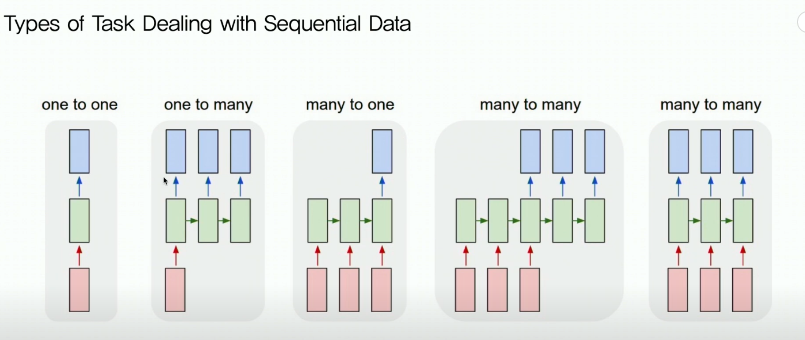

1은 one to many에 속하고  
2는 many to one문제에 속하는 거지. 주가나 재무제표 자료를 주고, 이 sequence에 대한 feature vector를 만들 수 있겠지. 이를 바탕으로 이진분류를 하는 경우.   
3이 many to many 1.이다 단어를 각각 그에 해당하는 단어로 바꾸어서 재구성하는 모델  
4가 w1에 대해서 바로 수행하는 것. 특정 단어가 주어인지 아닌지, 주어진 input에 대해서 바로 판별하는 것.

### Time Series Analysis  

- time domain analysis : 파형을 보고 파형의 폭, 주기, 높이를 분석하는 것, 낮은 수준의 분석
- Frequency domain analysis : 푸리에 변환을 하거나, wavelets이라는 기법을 활용해서 특정 파형이 있는지 없는지 분석할 수도 있을 것이고  
- Nearest neighbors analysis : DTW(Dynamic time warping), 시계열 데이터끼리 어떻게 유사성을 정의할 것인가에 관련한 내용
- Probabilistic Model : Language Modeling, 주어진 시퀀스에 대해 그 다음에 나올 값이 뭔가?를 확률적으로 모델링하는 이론
- (S)AR(I)MA(X) Models : Autocorrelation inside of time series, 좀 더 통계적으로 시계열 내에 Autocorrelation이 있는지 없는지 확인하는 것
- Decomposition : Time series = trend part + seasional part + residuals 라고 가정하고 분해하는 분석
- Nonlinear Dynamics : Different Equation (Ordinary, partial, stochastic 등...). 배웠던 미분 방정식들을 활용해서 변화하는 시스템을 미분방정식으로 모델링하는 것. 어렵지만 유용한 방법
- Machine Learning : Use ML model with hand - made features, 위에서 나온 기법들을 통한 feature를 분류나 회귀에 이용하는 것. 위는 feature를 만들어내는 기법이고 이를 이용해서 분류나 회귀를 돌리는 거지.   

근데 DL로 하려고 하는 건 이렇게 Manual한게 아니라 알아서 feature도 뽑고 분류나 회귀까지 시키려고 하는 거지

### Deep Learning with Sequential Data

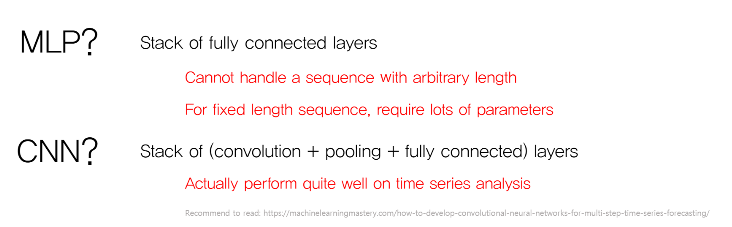
MLP와 CNN만 이용해서 시계열 데이터를 다룰 수 있을까?   
MLP의 경우에는 w metrics가 고정되어있기 때문에 임의의 길이를 가진 시계열 데이터를 다룰 수 없다. 다루기 위해서는 w에 맞춰서 시계열 데이터의 차원을 조정해줘야하는데 이러면 정보의 손실이나 변형 발생. 시계열 데이터의 길이가 고정되어있다고 하더라도 다양한 파라미터가 필요하기 때문에 부적절하다.  

CNN은 의외로 잘 다룰 수 있다. 시계열 데이터를 받아서 다변수 예측을 할 수 있는 모델도 나와있고 요즘은 CNN이랑 RNN을 같이 쓰기도 한다.  

### Recurrent Neural Network  

RNN의 기본 아이디어는 이전 단계에서의 output과 현재 시점의 input을 같이 고려해서 output을 만들자는 것.  
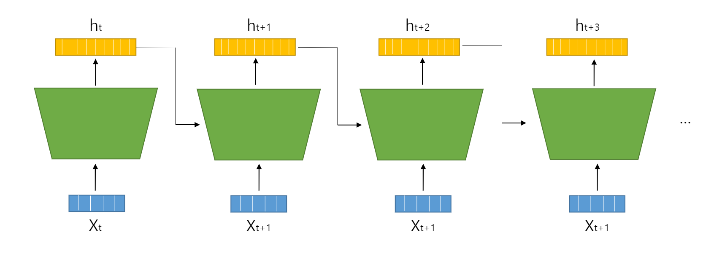

그러면 어떻게 기존의 Output과 새로운 Input을 합칠 수 있는가?   
초록색이 새로운 Input, h가 이전의 Output  
둘의 차원을 맞춰준 후 더해준다  
그 결과를 Non-linear Activation Function에 통과시킨 후의 결과값을 이용한다.  

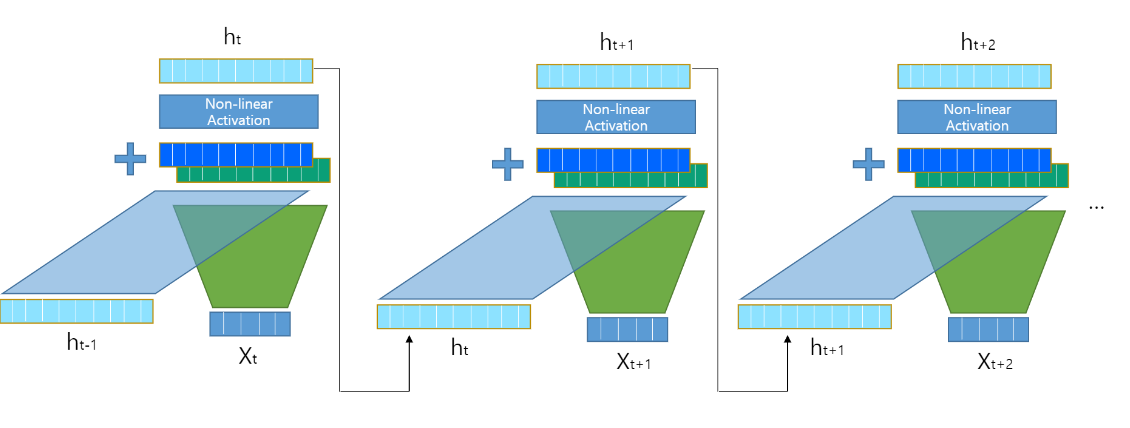  

Q1. h를 왜 바로 쓰지 않고 행렬을 곱해서 사용하나요?  
A. 매 단계에 맞춰서 쓰고 싶으니까...? 

Q2. 들어오는 데이터 길이가 다르다면 어떻게 처리하나요?  
A. 데이터 길이를 잘 맞춰야지...

Q3. h도 w처럼 계속 업데이트 되는 건가요?  
A. Yes  

Q4. 데이터가 문장이면 어떻게 처리하나요?  
A. Bag of Words를 만들어서 Vertorize 시켜서 One-hot-Encoding으로 표현...

**그럼 앞선 문제를 이런 방법을 이용해서 어떻게 해결할 수 있을까?**  

1. many to one의 경우 : 마지막에 나온 Ht에 필요한 모델을 붙이면 된다. 

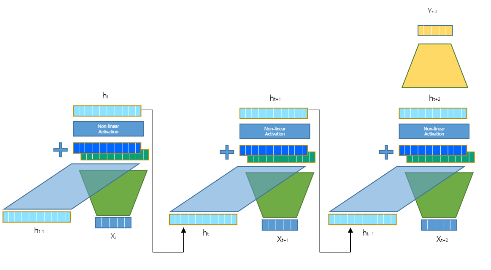

2. many to many의 경우  
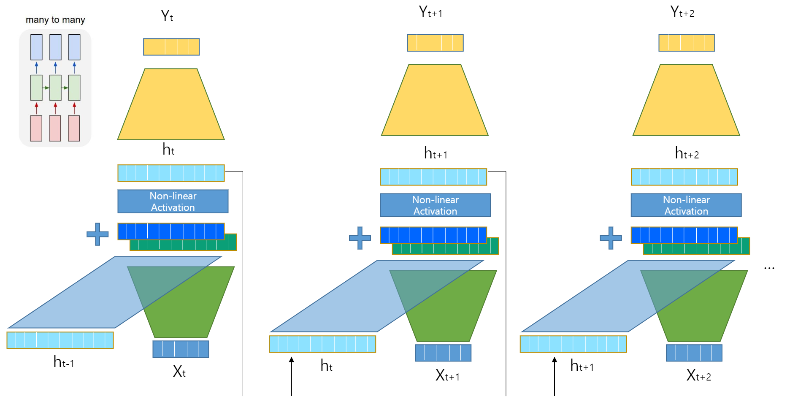  

각각의 Ht에 같은 모델을 붙인다. 단 RNN에서는 Parameter가 공유되므로 모든 모델에서 같은 Parameter를 바탕으로 수행. 이후 나온 Yt를 바탕으로 필요한 작업 수행

3. many to many (번역과 같은 경우)  
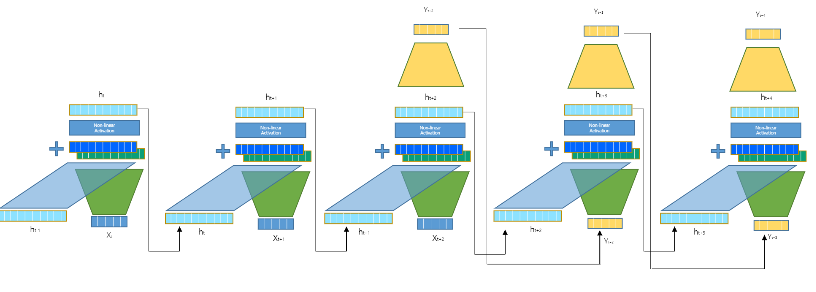  
Yt를 새로운 Input 처럼 이용할 수 있다. 

4. one to many (사진을 주고 문장을 생성하는 경우)   
Input으로 이미지 벡터를 넣는다면 CNN을 통해서 이미지를 인코딩한 거겠지...? 이후 디코딩을 거친다  

**Q. Sequence 길이가 다르면 어떻게 처리하나요??**  
A1. Max length를 정해놓고 그에 맞춰서 X를 만든다.   
A2. 동시에 배치 갯수의 Sequence를 처리할 수 있다고 했잖아? 쭉 진행을 하다보면 전처리의 완료 시점이 다르게 될텐데, 미리 리스트를 만들어 놓고 끝나는대로 리스트에 추가하는 방식이 있는데 어려운 방법이다. 

**Q. 출력값의 길이가 다른 경우는 어떻게 처리하나요??**
A1. 역시 Max length를 정해놓고 하는 방법이 있고
A2. EOS (End Of Sentence)를 데이터셋에 다 달아준다. 문장마다 BOS, EOS를 달아주면 문장을 디코딩하다가 문장을 끝낼 시점에 EOS를 넣도록 학습한다. 

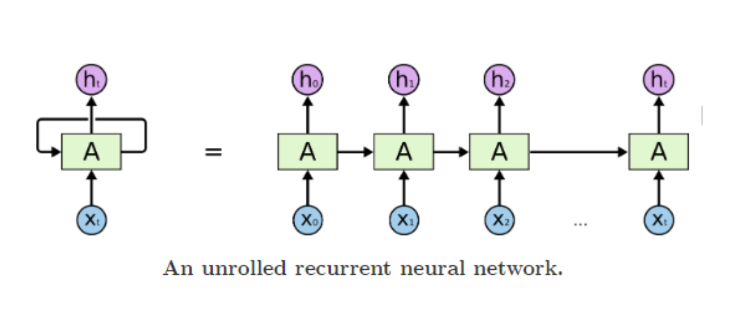  
이게 좀 더 직관적이긴 함

### 수학적으로 보는 RNN  

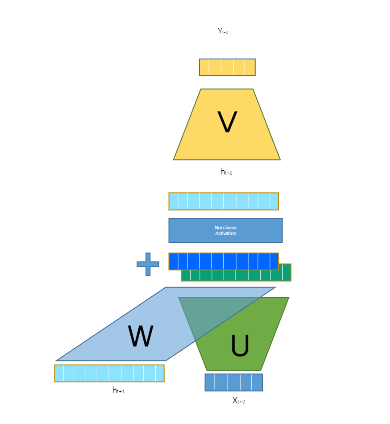  
파라미터들을 각각 u,w,v라고 했을 때

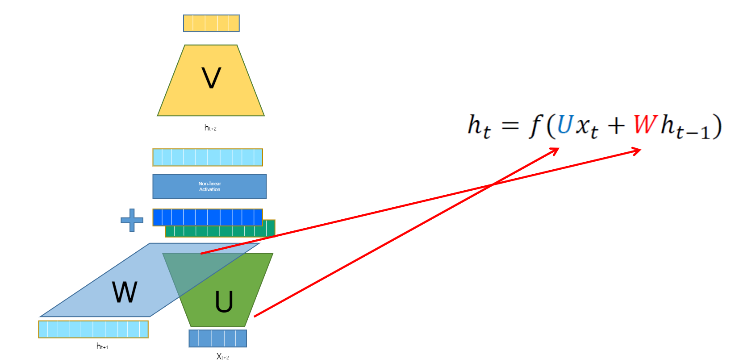  

Ht는 X의 인풋을 u로 projection 시키고, Ht-1을 W로 Projection 시키고 더한 후 Non-linear Activation Function에 통과시킨 것이다. 

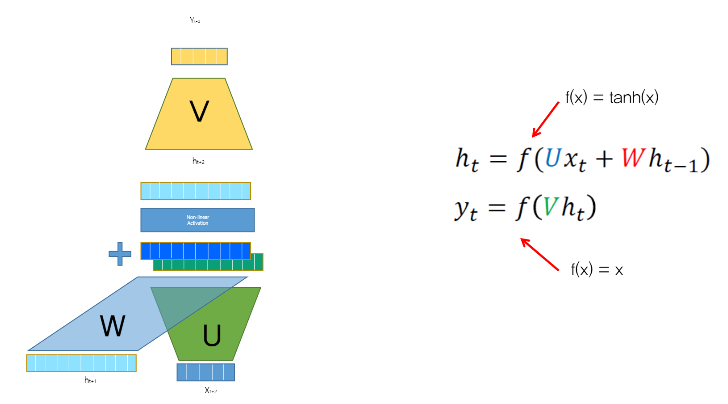  

Yt = V라는 파라미터를 통해 Projection 시키고 원한다면 Activation Function을 통과시키는데 RNN에서는 주로 Tanh(x) 를 주로 쓴다.  

위와 같은 구조를 varnila RNN이라고 한다.(기본 RNN이라는 뜻)   

**그럼 RNN은 어떻게 평가하는가?**  
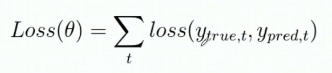  
걍 loss를 계산해서 다 더한 후 Sequence Length로 나누고, 그 값을 다 더해서(Sequence의 갯수로 나눠서)평균을 낸다. 

Q. Sequence가 길면 Gradient Vanishing이 일어나지 않나요?
A. 실제로 일어난다. 그 문제를 해결한 것이 LSTM인데 다음에 배울 것

이후 하려는 작업에 따라 Loss function만 정의해주면 된다. 

**요약**  
- Sequential Data를 다루는 데에 RNN이 적합하다.
- 핵심 아이디어는 각 단계에서의 Input과 이전 단계에서의 Output을 함께 활용하자는 것이다.
- 이를 활용하면 다양한 문제를 해결할 수 있다. 